# Police Bias Algorithm

## Racial Bias Score

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import ndtr

### Dataframe of the features that will be examined in the police department from 2016 to 2019

DataFrame that contains all of our features: 
**For the purposes of this algorithm, I inputted dummy data for values in order to test out the algorithm and look at the differences in z scores**

In [4]:
d = {'city': ['Portland', 'Portland', 'Portland', 'Portland'],
     'year': [2019, 2018, 2017, 2016],
     'quarter':[1,1,1,1],
    'total_pop': [654741,654741, 654741, 654741], 
     'black_pct':[0.058, 0.070, 0.090, 0.15], 
     'white_pct':[0.771, 0.785, 0.773, 0.799], 
     'latinx_pct':[0.097, 0.097, 0.097, 0.097], 
     'asian_pct':[0.081, 0.081, 0.081, 0.081],
     'other_pct':[0.007, 0.070, 0.057, 0.027], 
     'black_drive_stops': [5176, 5190, 5140, 5130], 
     'white_drive_stops':[18867, 18900, 18880, 18552],
     'latinx_drive_stops': [3000, 3003, 3030, 3020], #dummy
     'asian_drive_stops':[2000, 2010, 2015, 2020], #dummy
     'other_drive_stops':[150, 152, 155, 159], #dummy
    'black_uof': [232, 237, 230, 250], 
    'white_uof':[470, 475, 480, 490],
     'latinx_uof':[150, 155, 158, 156], #dummy
     'asian_uof':[30, 40, 50, 100],
     'other_uof':[10, 15, 19, 30]}
cities = pd.DataFrame(data = d)
cities

,city,year,quarter,total_pop,black_pct,white_pct,latinx_pct,asian_pct,other_pct,black_drive_stops,white_drive_stops,latinx_drive_stops,asian_drive_stops,other_drive_stops,black_uof,white_uof,latinx_uof,asian_uof,other_uof
0,Portland,2019,1,654741,0.058,0.771,0.097,0.081,0.007,5176,18867,3000,2000,150,232,470,150,30,10
1,Portland,2018,1,654741,0.070,0.785,0.097,0.081,0.070,5190,18900,3003,2010,152,237,475,155,40,15
2,Portland,2017,1,654741,0.090,0.773,0.097,0.081,0.057,5140,18880,3030,2015,155,230,480,158,50,19
3,Portland,2016,1,654741,0.150,0.799,0.097,0.081,0.027,5130,18552,3020,2020,159,250,490,156,100,30


### 2019 Population Statistics

#### Population Statistics Breakdown according to US Census

Calculations for the populations 

In [5]:
black_pop = cities['black_pct'] * cities['total_pop']
white_pop = cities['white_pct'] * cities['total_pop']
latinx_pop = cities['latinx_pct']* cities['total_pop']
asian_pop = cities['asian_pct']* cities['total_pop']
other_pop = cities['other_pct']* cities['total_pop']

### Arrest Disparities By Stops and Race

In [6]:
#ratio of stops according to racial makeup of city
pct_black_stops_to_pop = cities['black_drive_stops']/black_pop
pct_white_stops_to_pop = cities['white_drive_stops']/white_pop
pct_latinx_stops_to_pop = cities['latinx_drive_stops']/latinx_pop
pct_asian_stops_to_pop = cities['asian_drive_stops']/asian_pop
pct_other_stops_to_pop = cities['other_drive_stops']/other_pop

## Logit Scores

### Black to White Racial Bias Score

In [7]:
logit_white = np.log(pct_white_stops_to_pop/(1-pct_white_stops_to_pop))
logit_black = np.log(pct_black_stops_to_pop/(1-pct_black_stops_to_pop))
black_logit_score = round((logit_black - logit_white), 3)
#cities['black bias percentages'] = np.exp(black_logit_score)/(1+np.exp(black_logit_score))

### Latinx to White Racial Bias Score

In [8]:
logit_latinx = np.log(pct_latinx_stops_to_pop/(1-pct_latinx_stops_to_pop))
latinx_logit_score = round((logit_latinx - logit_white), 3)
#cities['latinx bias percentages'] = np.exp(latinx_logit_score)/(1+np.exp(latinx_logit_score))

### Asian to White Racial Bias Score

In [9]:
logit_asian = np.log(pct_asian_stops_to_pop/(1-pct_asian_stops_to_pop))
asian_logit_score = round((logit_asian - logit_white), 3)
#cities['asian bias percentages'] = np.exp(asian_logit_score)/(1+np.exp(asian_logit_score))

### Other racial groups to White Racial Bias Score

In [10]:
logit_other = np.log(pct_other_stops_to_pop/(1-pct_other_stops_to_pop))
other_logit_score = round((logit_other - logit_white), 3)
#cities['other bias percentages'] = np.exp(other_logit_score)/(1+np.exp(other_logit_score))

## Racial Bias Z Score

### Defining helper functions

Converting z scores to p values (percentages).

In [11]:
#convert all standardized scores into percentages
def percent(z_score_array):
    return 1- norm.cdf(abs(z_score_array)) #returns p-value

Plotting the normal curve with the z score.

In [12]:
def plot_normal(z_scores, racial_group):
    x_all = np.arange(-10, 10, 0.001) 
    max_z = max(z_scores)
    if max_z >=0:
        x_shade = np.arange(max_z, max(x_all),0.001)  
    else: 
        x_shade = np.arange(min(x_all), max_z, 0.001)

    y = norm.pdf(x_shade,0,1)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(x_all,norm.pdf(x_all,0,1))
    
    ax.fill_between(x_shade,y,0, alpha=0.3, color='b')
    ax.set_xlim([-4,4])
    ax.set_xlabel('# of Standard Deviations Outside the Mean')
    ax.set_yticklabels([])
    ax.set_title('Normal Gaussian Curve - Showing ' + racial_group + ' Racial Bias Z Score')
    plt.show()


### Calculating Each Z Score

In a perfect, equal world, the racial bias score would be 0. A larger z score indicates that the difference between arrests by race is large. A smaller z score indicates that the difference between arrests according to race is small. A negative z score indicates that more white people than black people are being arrested for stops.

In [13]:
black_z_score = (black_logit_score - black_logit_score.mean()) / black_logit_score.std()
black_p_val = percent(black_z_score)
cities['black bias percentages'] = black_p_val
black_z_score, black_p_val

(0    0.973134
 1    0.524261
 2   -0.175521
 3   -1.321874
 dtype: float64,
 array([0.16524325, 0.30004849, 0.43033514, 0.09310498]))

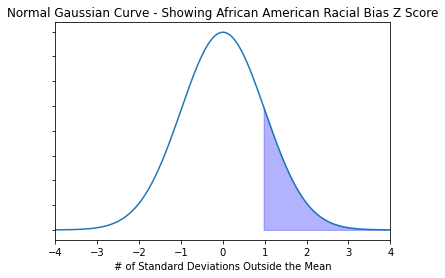

In [14]:
plot_normal(black_z_score, 'African American')

In [15]:
latinx_z_score = (latinx_logit_score - latinx_logit_score.mean()) / latinx_logit_score.std()
latinx_p_val = percent(latinx_z_score)
cities['latinx bias percentages'] = latinx_p_val

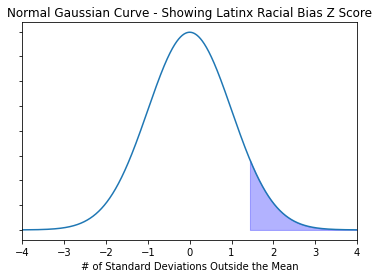

In [16]:
plot_normal(latinx_z_score, 'Latinx')

In [17]:
asian_z_score = (asian_logit_score - asian_logit_score.mean()) / asian_logit_score.std()
asian_p_val = percent(asian_z_score)
cities['asian bias percentages'] = asian_p_val


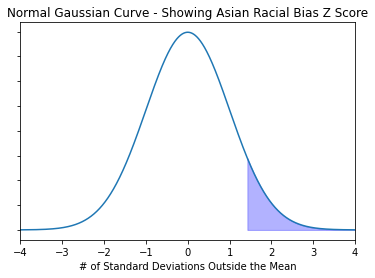

In [18]:
plot_normal(asian_z_score, 'Asian')

In [19]:
other_z_score = (other_logit_score - other_logit_score.mean()) / other_logit_score.std()
other_p_val = percent(other_z_score)
cities['other bias percentages'] = other_p_val

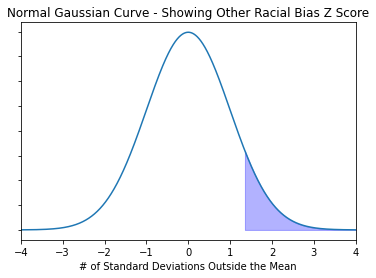

In [20]:
plot_normal(other_z_score, 'Other')

In [21]:
cities['black bias score'] = black_z_score
cities['latinx bias score'] = latinx_z_score
cities['asian bias score'] = asian_z_score
cities['other bias score'] = other_z_score

bias_col = cities.loc[: , "black bias score":"other bias score"]
cities['average racial bias score'] = bias_col.mean(axis=1)
cities['max racial bias score'] = bias_col.max(axis=1) #largest number of standard deviations from 0

bias_percent_col = cities.loc[: , "black bias percentages":"other bias percentages"]
cities['average racial bias percentage'] = bias_percent_col.mean(axis=1)
cities['min racial bias percentage'] = bias_percent_col.min(axis=1) #smallest probability that the observed happens under the null
cities

,city,year,quarter,total_pop,black_pct,white_pct,latinx_pct,asian_pct,other_pct,black_drive_stops,...,asian bias percentages,other bias percentages,black bias score,latinx bias score,asian bias score,other bias score,average racial bias score,max racial bias score,average racial bias percentage,min racial bias percentage
0,Portland,2019,1,654741,0.058,0.771,0.097,0.081,0.007,5176,...,0.198384,0.087875,0.973134,-0.863533,-0.847407,1.353954,0.154037,1.353954,0.161356,0.087875
1,Portland,2018,1,654741,0.070,0.785,0.097,0.081,0.070,5190,...,0.468665,0.197365,0.524261,-0.194991,-0.078625,-0.851071,-0.150107,0.524261,0.347195,0.197365
2,Portland,2017,1,654741,0.090,0.773,0.097,0.081,0.057,5140,...,0.309256,0.258182,-0.175521,-0.380697,-0.497961,-0.648959,-0.425785,-0.175521,0.337372,0.258182
3,Portland,2016,1,654741,0.150,0.799,0.097,0.081,0.027,5130,...,0.077224,0.441931,-1.321874,1.439222,1.423993,0.146076,0.421854,1.439222,0.171826,0.075044


### Confidence Intervals

We use a t test to determine whether the difference in racial bias scores per year are due to chance or statistically significant. To do this, we use an independent sample t test to find the 95% confidence interval. 

**df = 10, alpha = 0.05, t_table_score = 1.96**

We compare all scores to 0, since we would presume the racial bias scores were calculated by taking the difference of the logit white score and the logit of other racial groups, so in an equal society, we would expect the bias score to be 0. If the calculated value is less than the cutoff of 2.228, then p > 0.05, which means that the differences in means is not due to chance. As the p-value is greater than the alpha value, we cannot conclude that there is a difference between means.

In [22]:
#sum the scores in each column
black_bias_sum = sum(cities['black bias score'])
#calculate the means of each group
black_bias_avg = black_bias_sum/4
#use formula
black_bias = black_bias_avg

In [23]:
def mean_confidence_interval(data):
    m = sum(data)/4
    z = 1.96
    sd = data.std()
    rn = 2
    return (m, m-((1.96*sd)/rn), m+((1.96*sd)/rn))

In [24]:
black_bias_CI = mean_confidence_interval(cities['black bias percentages'])
print('Average and 95% Confidence Interval for African Americans:', black_bias_CI)

Average and 95% Confidence Interval for African Americans: (0.2471829638935869, 0.10095414966086663, 0.3934117781263072)


In [25]:
#sum the scores in each column
latinx_bias_sum = sum(cities['latinx bias score'])
#calculate the means of each group
latinx_bias_avg = latinx_bias_sum/4
#use formula
latinx_bias = latinx_bias_avg

In [26]:
latinx_bias_CI = mean_confidence_interval(cities['latinx bias percentages'])
print('Average and 95% Confidence Interval for Latinx:', latinx_bias_CI)

Average and 95% Confidence Interval for Latinx: (0.26084498320483185, 0.1074978159496481, 0.41419215046001556)


In [27]:
#sum the scores in each column
asian_bias_sum = sum(cities['asian bias score'])
#calculate the means of each group
asian_bias_avg = asian_bias_sum/4
#use formula
asian_bias = asian_bias_avg

In [28]:
asian_bias_CI = mean_confidence_interval(cities['asian bias percentages'])
print('Average and 95% Confidence Interval for Asians:', asian_bias_CI)

Average and 95% Confidence Interval for Asians: (0.26338243385623156, 0.10025334551071777, 0.4265115222017454)


In [29]:
#sum the scores in each column
other_bias_sum = sum(cities['other bias score'])
#calculate the means of each group
other_bias_avg = other_bias_sum/4
#use formula
other_bias = other_bias_avg

In [30]:
other_bias_CI = mean_confidence_interval(cities['other bias percentages'])
print('Average and 95% Confidence Interval for Other Racial Groups:', other_bias_CI)

Average and 95% Confidence Interval for Other Racial Groups: (0.2463384115596622, 0.10108495970825246, 0.391591863411072)


In [31]:
def pval(val): 
  if val < 0.05: 
    return 'Statistically Significant'
  else: 
    return 'Likely Due to Chance'

In [32]:
def zval(zscore):
    if abs(zscore) < 1.96:
        return 'Likely Due to Chance'
    else:
        return 'Statistically Significant'

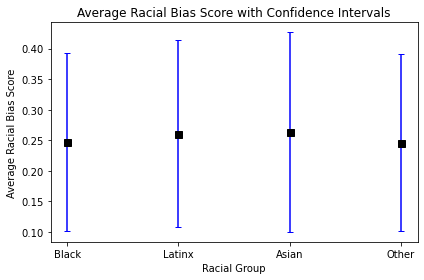

In [33]:
x_ticks = ("Black", "Latinx", "Asian", "Other")

x_1 = np.arange(1,5)


y_1 = [i[0] for i in [black_bias_CI, latinx_bias_CI, asian_bias_CI, other_bias_CI]]


err_1 = [i[2]-i[0] for i in [black_bias_CI, latinx_bias_CI, asian_bias_CI, other_bias_CI]]

plt.errorbar(x=x_1, y=y_1, yerr=err_1, color="blue", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="black", mec="black")


plt.xticks(x_1, x_ticks)

plt.ylabel('Average Racial Bias Score')
plt.xlabel('Racial Group')
plt.title('Average Racial Bias Score with Confidence Intervals')
plt.tight_layout()
plt.show()

## P-Values of Calculated Racial Bias Z Scores. Are the differences in racial bias score due to chance? 

In [34]:
print('Black:' , zval(black_bias),',' 
      , 'Latinx:' , zval(latinx_bias), ',' 
      , 'Asian:' , zval(asian_bias), ',' 
      , 'Other:' , zval(other_bias))

Black: Likely Due to Chance , Latinx: Likely Due to Chance , Asian: Likely Due to Chance , Other: Likely Due to Chance


## Excessive Force Score According to Race

Binomial ~ (n = number of black people arrested, p = probability of being handled with excessive force if they had been white)

What would the likelihood of excessive force look like if the victims had been white?

In [35]:
#white excessive force by arrest
p = np.exp(np.log(cities['white_uof']) - np.log(cities['white_drive_stops']))

#black excessive force by arrest
p_black = np.exp(np.log(cities['black_uof']) - np.log(cities['black_drive_stops']))
p_latinx = np.exp(np.log(cities['latinx_uof']) - np.log(cities['latinx_drive_stops']))
p_asian = np.exp(np.log(cities['asian_uof']) - np.log(cities['asian_drive_stops']))
p_other = np.exp(np.log(cities['other_uof']) - np.log(cities['other_drive_stops']))

The excessive force score is caluclated using two binomial distibutions :
<br> 1. Binomial(n= number of black drive stops, p= probability of black uof)
<br> 2. Binomial(n= number of white drive stops, p_black= probability of white uof)
<br> We assume that these two binomial distributions are independent. We then compute the following hypothesis test to see if the difference between these distributions is statistically significant:
<br> H_null: p_black = p_white, H_alt: p_black > p_white
<br> Using the test statistic: Z = (p_black - p_white) / sqrt(p_hat * (1-p_hat) * (1/n_1 + 1/n_2)), 
p_hat = (n_1 * p_black + n_2 * p_white)/(n_1 + n_2)
<br> This gives us our excessive force score, and allows us to either fail to reject or reject the null hypothesis based on our selected confidence level to see whether the difference in excessive force between white and non-white people is statistically significant.

The larger the z score is, the less likely it is that the probability of excessive force on white and non-white civilians is the same. This indicates a larger disparity between treatment of white vs non-white civilians. A positive z-score means that the probability of excessive force is higher for non-white civilians than white civilians, since it is the number of standard deviations the probability of non-white versus white is from 0.

### Definining helper functions

In [36]:
def plot_normal_ex(z_scores, racial_group):
    x_all = np.arange(-10, 10, 0.001) 
    max_z = max(z_scores)
    if max_z >=0:
        x_shade = np.arange(max_z, max(x_all),0.001)  
    else: 
        x_shade = np.arange(min(x_all), max_z, 0.001)

    y = norm.pdf(x_shade,0,1)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(x_all,norm.pdf(x_all,0,1))
    
    ax.fill_between(x_shade,y,0, alpha=0.3, color='b')
    ax.set_xlim([-4,4])
    ax.set_xlabel('# of Standard Deviations Outside the Mean')
    ax.set_yticklabels([])
    ax.set_title('Normal Gaussian Curve - Showing ' + racial_group + ' Excessive Force Score')
    plt.show()

### Black Excessive Force Score

In [37]:
#using a binomial, I find the average and standard deviation
#using a binomial, I find the average and standard deviation
black_mean_by_arrest = cities['white_drive_stops'] * p
black_var_by_arrest = cities['black_drive_stops'] * p * (1 - p)
black_std_by_arrest = np.sqrt(black_var_by_arrest)

black_force_score1 = round((cities['black_uof'] - black_mean_by_arrest) / black_std_by_arrest, 2)

#Binomial(n=number of black drive stops, p=probability of black uof)
black_mean_by_arrest2 = cities['black_drive_stops'] * p_black
black_var_by_arrest2 = cities['black_drive_stops'] * p_black * (1 - p_black)
black_std_by_arrest2 = np.sqrt(black_var_by_arrest2)

black_force_score2 = round((cities['black_uof'] - black_mean_by_arrest2) / black_std_by_arrest2, 2)

#excessive force score is calculated using a hypothesis test - significant difference btw two independent binomial dist.
#z score tells us if the difference between the two binomial distributions is statistically significant
p_hat = (black_mean_by_arrest + black_mean_by_arrest2)/(cities['white_drive_stops']+cities['black_drive_stops'])
black_force_score = (p_black-p)/np.sqrt( p_hat* (1-p_hat)* ( (1/cities['white_drive_stops']) + (1/cities['black_drive_stops']) ) )

black_force_percent = [percent(i) for i in np.array(black_force_score)]

black_force_score

0    7.537173
1    7.736248
2    7.251890
3    8.132789
dtype: float64

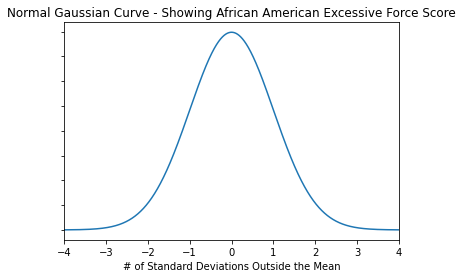

In [38]:
plot_normal_ex(black_force_score, 'African American') # so large it does not show on this acis

### Latinx Excessive Force Score

In [39]:
latin_mean_by_arrest = cities['white_drive_stops'] * p
latin_var_by_arrest = cities['latinx_drive_stops'] * p * (1 - p)
latin_std_by_arrest = np.sqrt(latin_var_by_arrest)

latin_force_score1 = round((cities['latinx_uof'] - latin_mean_by_arrest) / latin_std_by_arrest, 2)

latin_mean_by_arrest2 = cities['latinx_drive_stops'] * p_latinx
latin_var_by_arrest2 = cities['latinx_drive_stops'] * p_latinx * (1 - p_latinx)
latin_std_by_arrest2 = np.sqrt(latin_var_by_arrest2)

latin_force_score2 = round((cities['latinx_uof'] - latin_mean_by_arrest2) / latin_std_by_arrest2, 2)

#excessive force score is calculated using a hypothesis test - significant difference btw two independent binomial dist.
#z score tells us if the difference between the two binomial distributions is statistically significant
p_hat = (latin_mean_by_arrest + latin_mean_by_arrest2)/(cities['white_drive_stops'] + cities['latinx_drive_stops'])
latinx_force_score =(p_latinx-p)/np.sqrt( p_hat* (1-p_hat)* ( (1/cities['white_drive_stops']) + (1/cities['latinx_drive_stops']) ) )

latinx_force_percent = [percent(i) for i in np.array(latinx_force_score)]
latinx_force_score, latinx_force_percent

(0    7.690269
 1    8.065648
 2    8.120628
 3    7.548006
 dtype: float64,
 [7.327471962526033e-15,
  3.3306690738754696e-16,
  2.220446049250313e-16,
  2.2093438190040615e-14])

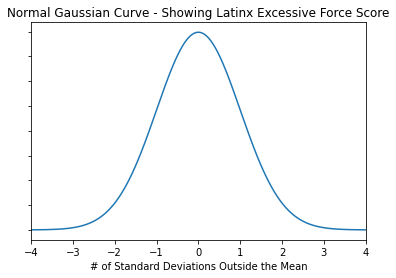

In [40]:
plot_normal_ex(latinx_force_score, 'Latinx')

### Asian Excessive Force Score

In [41]:
asian_mean_by_arrest = cities['asian_drive_stops'] * p
asian_var_by_arrest = cities['asian_drive_stops'] * p * (1 - p)
asian_std_by_arrest = np.sqrt(asian_var_by_arrest)

asian_force_score1 = round((cities['asian_uof'] - asian_mean_by_arrest) / asian_std_by_arrest, 2)

asian_mean_by_arrest2 = cities['asian_drive_stops'] * p_asian
asian_var_by_arrest2 = cities['asian_drive_stops'] * p_asian * (1 - p_asian)
asian_std_by_arrest2 = np.sqrt(asian_var_by_arrest2)

asian_force_score2 = round((cities['asian_uof'] - asian_mean_by_arrest2) / asian_std_by_arrest2, 2)

#excessive force score is calculated using a hypothesis test - significant difference btw two independent binomial dist.
#z score tells us if the difference between the two binomial distributions is statistically significant
p_hat = (asian_mean_by_arrest + asian_mean_by_arrest2)/(cities['white_drive_stops']+cities['asian_drive_stops'])
asian_force_score = (p_asian-p)/np.sqrt( p_hat* (1-p_hat)* ( (1/cities['white_drive_stops']) + (1/cities['asian_drive_stops']) ) )

asian_force_percent = [percent(i) for i in np.array(asian_force_score)]
asian_force_score

0    -6.827525
1    -3.396705
2    -0.374759
3    11.458423
dtype: float64

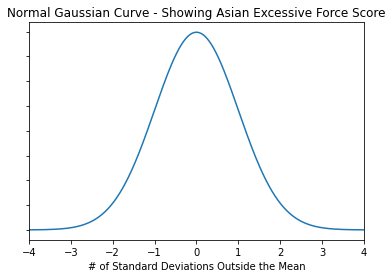

In [42]:
plot_normal_ex(asian_force_score, 'Asian')

### Other Excessive Force Score

In [43]:
other_mean_by_arrest = cities['white_drive_stops'] * p
other_var_by_arrest = cities['other_drive_stops'] * p * (1 - p)
other_std_by_arrest = np.sqrt(other_var_by_arrest)

other_force_score1 = round((cities['other_uof'] - other_mean_by_arrest) / other_std_by_arrest, 2)

other_mean_by_arrest2 = cities['other_drive_stops'] * p_other
other_var_by_arrest2 = cities['other_drive_stops'] * p_other * (1 - p_other)
other_std_by_arrest2 = np.sqrt(other_var_by_arrest2)

other_force_score2 = round((cities['other_uof'] - other_mean_by_arrest2) / other_std_by_arrest2, 2)

#excessive force score is calculated using a hypothesis test - significant difference btw two independent binomial dist.
#z score tells us if the difference between the two binomial distributions is statistically significant
p_hat = (other_mean_by_arrest + other_mean_by_arrest2)/(cities['white_drive_stops']+ cities['other_drive_stops'])
other_force_score = (p_other-p)/np.sqrt( p_hat* (1-p_hat)* ( (1/cities['white_drive_stops']) + (1/cities['other_drive_stops']) ) )
other_force_percent = [percent(i) for i in np.array(other_force_score)]
other_force_percent

[0.0005822455797760417, 5.794310364848343e-09, 2.353672812205332e-14, 0.0]

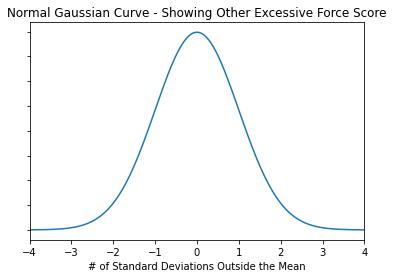

In [44]:
plot_normal_ex(other_force_score, 'Other')

## Excessive Force Score

In [45]:
all = [black_force_score, latinx_force_score, asian_force_score, other_force_score]
avg_excessive_force_score = (sum(all)/len(all))/np.sqrt(4*(.5)**2) # taking the weighted average of all z scores and then normalizing by the variance
avg_force_percent = (sum(black_force_percent) + sum(latinx_force_percent) + sum(asian_force_percent) + sum(other_force_percent))/len(all)


cities['black excessive force score'] = black_force_score
cities['latinx excessive force score'] = latinx_force_score
cities['asian excessive force score'] = asian_force_score
cities['other excessive force score'] = other_force_score
cities['average excessive force score'] = avg_excessive_force_score

cities['black excessive force percent'] = black_force_percent
cities['latinx excessive force percent'] = latinx_force_percent
cities['asian excessive force percent'] = asian_force_percent
cities['other excessive force percent'] = other_force_percent

force_col = cities.loc[: , "black excessive force score":"other excessive force score"]
cities['average excessive force score'] = force_col.mean(axis=1)
cities['max excessive force score'] = force_col.max(axis=1)

force_col_percent = cities.loc[: , "black excessive force percent":"other excessive force percent"]
cities['average force percent'] = force_col_percent.mean(axis=1)
cities['min force percent'] = force_col_percent.min(axis=1)


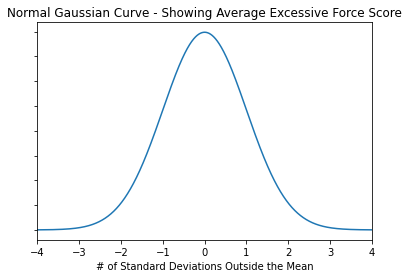

In [46]:
plot_normal_ex(avg_excessive_force_score, 'Average')

In [47]:
cities

,city,year,quarter,total_pop,black_pct,white_pct,latinx_pct,asian_pct,other_pct,black_drive_stops,...,asian excessive force score,other excessive force score,average excessive force score,black excessive force percent,latinx excessive force percent,asian excessive force percent,other excessive force percent,max excessive force score,average force percent,min force percent
0,Portland,2019,1,654741,0.058,0.771,0.097,0.081,0.007,5176,...,-6.827525,3.247438,2.911839,2.398082e-14,7.327472e-15,4.319545e-12,5.822456e-04,7.690269,1.455614e-04,7.327472e-15
1,Portland,2018,1,654741,0.070,0.785,0.097,0.081,0.070,5190,...,-3.396705,5.705670,4.527715,5.107026e-15,3.330669e-16,3.410119e-04,5.794310e-09,8.065648,8.525442e-05,3.330669e-16
2,Portland,2017,1,654741,0.090,0.773,0.097,0.081,0.057,5140,...,-0.374759,7.539781,5.634385,2.055023e-13,2.220446e-16,3.539199e-01,2.353673e-14,8.120628,8.847997e-02,2.220446e-16
3,Portland,2016,1,654741,0.150,0.799,0.097,0.081,0.027,5130,...,11.458423,12.394890,9.883527,2.220446e-16,2.209344e-14,0.000000e+00,0.000000e+00,12.394890,5.578871e-15,0.000000e+00


## Confidence Intervals

The exceessive force score is calculated using a z-test. This z-score tells us whether the excessive force is statistically significant or not. Using a one-tailed test at the 95% confidence level, we can compare the z-score to z = 2.086. If  z  > 2.086, we reject the null hypothesis that the difference in binomial distributions is due to chance, else we fail to reject the null hypothesis that the difference is statistically significant.

In [48]:

def pval(val): 
  if val < 0.05: 
    return 'Statistically Significant'
  else: 
    return 'Likely Due to Chance'

In [49]:
def zval(zscore):
    if zscore < 2.086:
        return 'Likely Due to Chance'
    else:
        return 'Statistically Significant'

In [50]:
#sum the scores in each column
black_ex_sum = sum(cities['black excessive force score'])
#calculate the means of each group
black_ex_avg = black_ex_sum/4
#sum the scores in each column
latinx_ex_sum = sum(cities['latinx excessive force score'])
#calculate the means of each group
latinx_ex_avg = latinx_ex_sum/4
#sum the scores in each column
asian_ex_sum = sum(cities['asian excessive force score'])
#calculate the means of each group
asian_ex_avg = asian_ex_sum/4
#sum the scores in each column
other_ex_sum = sum(cities['other excessive force score'])
#calculate the means of each group
other_ex_avg = other_ex_sum/4

In [51]:
#using the average z-score over all years
print('Black:' , zval(black_ex_avg),',' 
      , 'Latinx:' , zval(latinx_ex_avg), ',' 
      , 'Asian:' , zval(asian_ex_avg), ',' 
      , 'Other:' , zval(other_ex_avg))

Black: Statistically Significant , Latinx: Statistically Significant , Asian: Likely Due to Chance , Other: Statistically Significant


In [52]:
black_force_CI = mean_confidence_interval(cities['black excessive force score'])
print('Average and 95% Confidence Interval for African Americans:', black_force_CI)

Average and 95% Confidence Interval for African Americans: (7.6645249489620815, 7.3018361857329115, 8.027213712191251)


In [53]:
latinx_force_CI = mean_confidence_interval(cities['latinx excessive force score'])
print('Average and 95% Confidence Interval for Latinx:', latinx_force_CI)
latinx_force_CI[2]

Average and 95% Confidence Interval for Latinx: (7.8561374969329245, 7.581092496541889, 8.131182497323959)


8.131182497323959

In [54]:
asian_force_CI = mean_confidence_interval(cities['asian excessive force score'])
print('Average and 95% Confidence Interval for Asians:', asian_force_CI)

Average and 95% Confidence Interval for Asians: (0.21485837579196643, -7.571958528370862, 8.001675279954796)


In [55]:
other_force_CI = mean_confidence_interval(cities['other excessive force score'])
print('Average and 95% Confidence Interval for Other Racial Groups:', other_force_CI)

Average and 95% Confidence Interval for Other Racial Groups: (7.221944687991939, 3.428269643626689, 11.015619732357187)


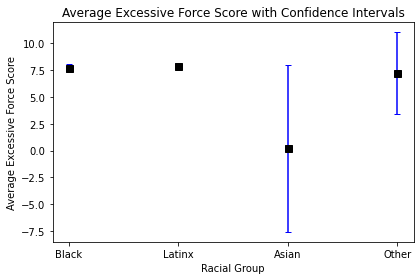

In [56]:
x_ticks = ("Black", "Latinx", "Asian", "Other")

x_1 = np.arange(1,5)


y_1 = [black_ex_avg, latinx_ex_avg, asian_ex_avg, other_ex_avg]


err_1 = [i[2]-i[0] for i in [black_force_CI, latinx_force_CI, asian_force_CI, other_force_CI]]

plt.errorbar(x=x_1, y=y_1, yerr=err_1, color="blue", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="black", mec="black")


plt.xticks(x_1, x_ticks)

plt.ylabel('Average Excessive Force Score')
plt.xlabel('Racial Group')
plt.title('Average Excessive Force Score with Confidence Intervals')
plt.tight_layout()
plt.show()

## Diagnostic Score

Finally, we calculate the diagnostic score. The racial bias score was a z score that represented whether the difference between white and non-white traffic stops was statistically significant. We took the max over all non-white racial groups in a given year to get the max z score. The excessive force score was also a z score that represented whether the difference between the probability of excessive force being used on white vs non white civilians was statistically significant. Again, we took the max over all non-white racial groups to get the max excessive force score for a given year. To calculate the diagnostic score, we first take the average of the p-values of the max racial bias scores and max excessive force scores, because the average of two z-scores alone is not a z-score. We then convert this averaged percentiles to z-scores, to see how many deviations away from 0 the overall racial bias is in a police department.

In [57]:
def z_score(p_val):
    return norm.ppf(1-p_val)

In [58]:
diagnostic_percentile = (cities['min racial bias percentage'] + cities['min force percent'])/2 #taking the highest racial bias/excessive force score
diagnostic_score = z_score(diagnostic_percentile)
cities['diagnostic score'] = diagnostic_score
cities['diagnostic percentile'] = diagnostic_percentile

In [329]:
cities

,Unnamed: 0,year,total_pop,black_pct,white_pct,latinx_pct,asian_pct,other_pct,black_drive_stops,white_drive_stops,...,average excessive force score,black excessive force percent,latinx excessive force percent,asian excessive force percent,other excessive force percent,max excessive force score,average force percent,min force percent,diagnostic score,diagnostic percentile
0,0,2019,979263,0.073876,0.487804,0.324750,0.081220,0.032350,19520,65704,...,3.621927,0.0,0.000000e+00,0.0,0.000003,23.531897,6.345209e-07,0.0,1.791637,0.036596
1,1,2018,964243,0.081260,0.488072,0.326628,0.075899,0.028141,17754,57173,...,5.440725,0.0,3.106913e-09,0.0,0.000000,21.146515,7.767283e-10,0.0,1.423561,0.077287
2,2,2017,950714,0.073482,0.477327,0.341820,0.075248,0.032124,19977,67347,...,-7.925352,0.0,0.000000e+00,0.0,0.048237,16.097849,1.205934e-02,0.0,1.414875,0.078553
3,3,2016,947897,0.073367,0.484505,0.347595,0.069407,0.025126,18171,66695,...,-6.064046,0.0,3.809597e-11,0.0,0.003384,14.901630,8.460217e-04,0.0,1.684527,0.046040
